### PCA vs. k-means (Big Picture)
- **PCA** finds patterns across your *columns* (features), capturing directions where the data varies the most by creating new orthogonal axes.
- **k-means** finds patterns *in your rows* (samples), grouping similar observations together.
- They're both **unsupervised learning** tools: they work without knowing target labels or outcomes.

### Why Standardize and Center Data?
- PCA is sensitive to how variables are scaled. If your columns (features) have different ranges/units, those with bigger spreads (e.g., incomes in dollars vs. age in years) will dominate the variance calculations.
- **Standardization** ensures each feature: mean = 0, standard deviation = 1:
  $$
  Z = \frac{X - \mu}{\sigma}
  $$
- **Centering** shifts the mean of each column to zero – this puts the "balance point" of the cloud at the origin.
- **Why?** It guarantees all features contribute fairly to the principal components

### Step-By-Step PCA Workflow

**Step 1: Normalize the Data**

In [1]:
import numpy as np
import pandas as pd

# Example: Load a dataset (California housing prices, ignoring target)
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import fetch_california_housing

X, _ = fetch_california_housing(return_X_y=True)
X = pd.DataFrame(X)

# Standardize (zero mean, unit variance)
scaler = StandardScaler()
X_norm = scaler.fit_transform(X)

# OR (manual):
mu = X.mean()
sigma = X.std()
X_norm_manual = (X - mu) / sigma


**Step 2: Compute the Covariance Matrix**

Covariance tells you how features vary together. The covariance matrix is square (features x features).

In [2]:
cov_matrix = np.cov(X_norm, rowvar=False)
cov_matrix

array([[ 1.00004845, -0.11903976,  0.32691127, -0.06204314,  0.00483458,
         0.01876716, -0.07981299, -0.0151766 ],
       [-0.11903976,  1.00004845, -0.15328485, -0.07775105, -0.29625859,
         0.013192  ,  0.01117321, -0.10820206],
       [ 0.32691127, -0.15328485,  1.00004845,  0.84766239, -0.07221635,
        -0.00485253,  0.10639412, -0.02754139],
       [-0.06204314, -0.07775105,  0.84766239,  1.00004845, -0.06620061,
        -0.0061815 ,  0.06972451,  0.01334504],
       [ 0.00483458, -0.29625859, -0.07221635, -0.06620061,  1.00004845,
         0.06986612, -0.10879002,  0.09977806],
       [ 0.01876716,  0.013192  , -0.00485253, -0.0061815 ,  0.06986612,
         1.00004845,  0.0023663 ,  0.00247594],
       [-0.07981299,  0.01117321,  0.10639412,  0.06972451, -0.10879002,
         0.0023663 ,  1.00004845, -0.92470924],
       [-0.0151766 , -0.10820206, -0.02754139,  0.01334504,  0.09977806,
         0.00247594, -0.92470924,  1.00004845]])

**Step 3: Calculate Eigenvalues and Eigenvectors OR Singular Value Decomposition (SVD)**

Eigenvectors tell you the directions (principal components).

Eigenvalues tell you the importance (how much variance) of each direction.

SVD is a robust method, especially for numerical stability. Most modern PCA uses SVD under the hood.

In [3]:
# Using numpy.linalg for eigen-decomposition
eig_vals, eig_vecs = np.linalg.eigh(cov_matrix)

# OR using SVD directly (recommended for PCA):
from scipy.linalg import svd
U, s, Vt = svd(X_norm, full_matrices=False)

# s = singular values; Vt = components (rows=components, cols=features)

# Interpretation:
# Top principal components = rows of Vt, ordered by decreasing "importance" (singular values).

**Step 4: Sort Components & Choose How Many to Keep**  

Sort the eigenvalues (variance explained) and their eigenvectors to put the most important first.

Usually, you keep just enough PCs to explain 80–95% of total variance 

**Step 5: Project the Data Onto the Chosen Components**

In [4]:
# Project data onto the first K principal components
K = 2  # example: first two PCs
X_pca = np.dot(X_norm, Vt[:K].T)

# Now, each sample is represented by K numbers (instead of the full D features).

**Checking Your SVD: Reconstruction**

Can you re-create the original (normalized) data using U, S, Vt? Yes! (This is a perfect check)

In [5]:
Sigma = np.diag(s)                 # SVD returns s as an array, make diagonal matrix
X_reconstructed = U @ Sigma @ Vt   # @ is matrix multiplication
np.allclose(X_norm, X_reconstructed)  # Should return True


True

How PCA Finds the Best Axes**
- It finds new directions by maximizing spread (variance) of the data when projected onto those lines.
- **First principal component:** The line/direction through the data cloud with the biggest variation.
- **Second principal component:** Perpendicular to the first, captures the next highest variance, and so on.
- Each **principal component** is a linear combination of all original features (think: weighted blends).

Example with Highly Correlated Features**
- Imagine two columns: Fahrenheit and Celsius. They're nearly identical after accounting for conversion. PCA will combine them into one component, ignoring redundant info, and maximize overall spread.
- Throwing away any one column doesn't capture as much total variance as projecting onto the "best fit" line does.

Properties of Principal Components**
- They are **uncorrelated** (orthogonal).
- Each explains the maximal remaining variance.
- Number of components ≤ number of original features.
- Their coefficients (loadings) show how much each original feature contributes to the component.

How to Choose How Many Components to Keep**
- **Scree plot:** Shows how much variance each component explains. Look for the "elbow" (flattening of the curve).
- **Cumulative variance explained:** Keep enough components to capture a satisfactory percent (e.g., 90%).
- **Eigenvalues > 1:** (for standardized data) is another common rule.

Practical Notes & Pitfalls**
- **PCA loses interpretability.** The components are not always easy to explain because they mix several features.
- **Scaling is key!** Never skip normalization unless all features are already comparable.
- **Works best for numeric data.** Do not apply PCA to categorical variables directly.

[0.25336868 0.23516245 0.15888635 0.12887971 0.12538195 0.0824225
 0.01020022 0.00569814]


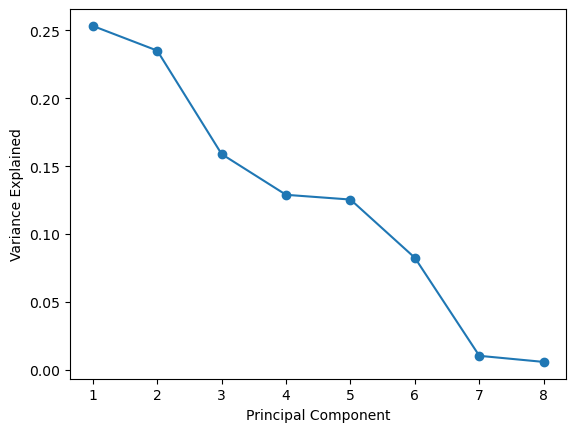

In [ ]:
# Full PCA Example: Boston Housing Dataset

from sklearn.decomposition import PCA

# After standardizing, fitting 
# Creates a PCA object with default settings—a tool to learn how your features vary together.
pca = PCA()
# Analyzes the scaled data to calculate the principal components (directions capturing most 
# variance), and computes statistics like how much each component contributes.
# PCA finds combinations of your input features (the principal components) that explain as 
# much variability in your data as possible.
pca.fit(X_norm)

# Variance explained by each PC
print(pca.explained_variance_ratio_)

# Project data onto K principal components
K = 2
X_pca = pca.transform(X_norm)[:, :K]

# Scree plot (variance per component)
import matplotlib.pyplot as plt
plt.plot(np.arange(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, 'o-')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()


In [7]:
# Sources:

# [1](https://builtin.com/data-science/step-step-explanation-principal-component-analysis)
# [2](https://www.cs.cmu.edu/~elaw/papers/pca.pdf)
# [3](https://www.youtube.com/watch?v=FgakZw6K1QQ)
# [4](https://arxiv.org/abs/1404.1100)
# [5](https://www.reddit.com/r/statistics/comments/2yp3tl/can_someone_please_explain_principal_component/)
# [6](https://www.geeksforgeeks.org/data-analysis/principal-component-analysis-pca/)
# [7](https://www.billconnelly.net/?p=697)
# [8](https://statisticsbyjim.com/basics/principal-component-analysis/)
# [9](https://www.reddit.com/r/engineering/comments/pze0f6/6_minutes_intro_to_pca_principal_component/)